In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

In [18]:
df_google = pd.read_csv("GOOG.csv")
df_google.head()

,date,open,high,low,close,volume
0,2014-03-27,28.4000,28.4000,27.6460,27.9230,262000
1,2014-03-28,28.0600,28.3215,27.9335,27.9995,822000
2,2014-03-31,28.3445,28.3500,27.8465,27.8485,216000
3,2014-04-01,27.9355,28.4225,27.9355,28.3580,158000
4,2014-04-02,28.2553,30.2415,28.1095,28.3500,2934000


In [19]:
df_google.info() # check the data types in google csv dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2360 non-null   object 
 1   open    2360 non-null   float64
 2   high    2360 non-null   float64
 3   low     2360 non-null   float64
 4   close   2360 non-null   float64
 5   volume  2360 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 110.8+ KB


In [20]:
df_google.dtypes # short - check the data types in google csv dataframe

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [21]:
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d')
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2360 non-null   datetime64[ns]
 1   open    2360 non-null   float64       
 2   high    2360 non-null   float64       
 3   low     2360 non-null   float64       
 4   close   2360 non-null   float64       
 5   volume  2360 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 110.8 KB


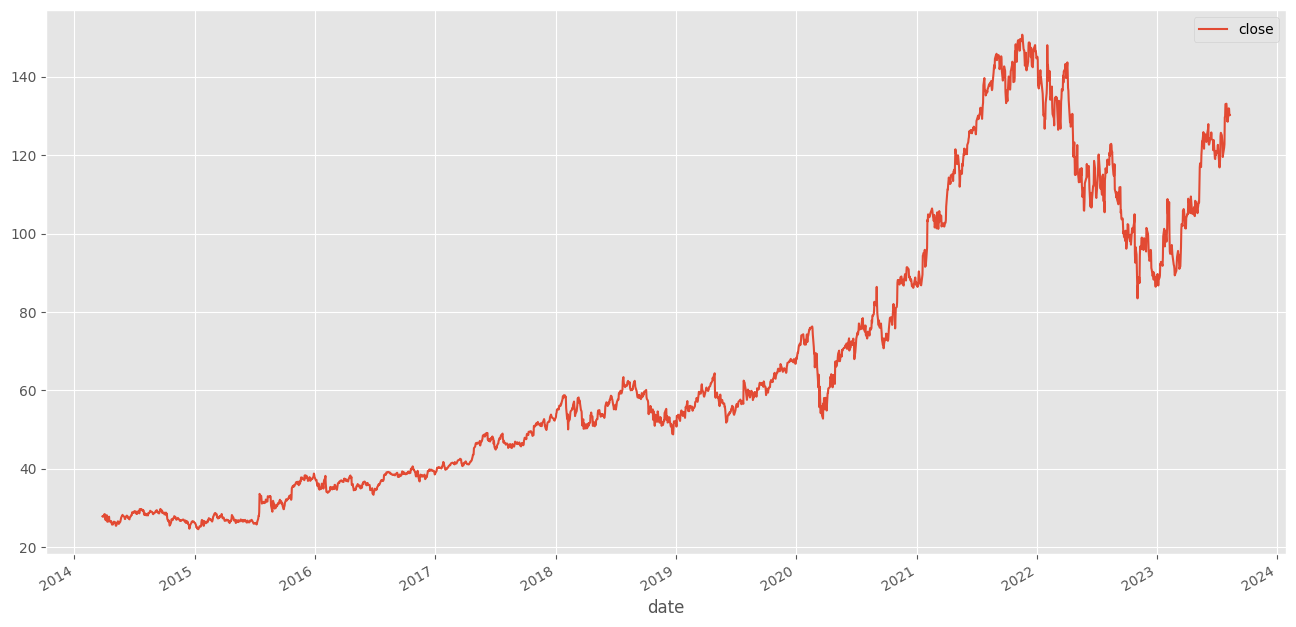

In [22]:
style.use("ggplot")
df_google.plot(x="date", y="close", figsize=(16,8))
plt.show()

In [23]:
col_4 =  df_google["close"].to_numpy()  #convert close price to column
print(col_4)

avg = []
i = 0
win = 31            # Window Size
n = len(col_4)
print(n)

while i < n - win - 1:                              #Average of elements upto windows size
    average = round(np.sum(col_4[i:i+win]/win),2)
    avg.append(average)
    i+=1

print(avg)

no_noise = { "close": avg}                     # Converting numpy array to Pandas Data series
df_no_noise = pd.DataFrame(no_noise)


df_no_noise["data"] = df_google["date"]         # Data Serie to Data Frame
print(df_no_noise)


[ 27.923   27.9995  27.8485 ... 131.84   130.15   130.21  ]
2360
[26.87, 26.82, 26.78, 26.73, 26.65, 26.58, 26.51, 26.49, 26.49, 26.48, 26.46, 26.5, 26.55, 26.59, 26.63, 26.63, 26.64, 26.67, 26.7, 26.74, 26.8, 26.88, 26.94, 26.98, 27.02, 27.04, 27.07, 27.11, 27.17, 27.25, 27.33, 27.41, 27.49, 27.56, 27.64, 27.73, 27.83, 27.91, 28.0, 28.07, 28.11, 28.15, 28.16, 28.19, 28.23, 28.27, 28.31, 28.36, 28.44, 28.5, 28.56, 28.62, 28.67, 28.72, 28.78, 28.84, 28.91, 28.95, 28.97, 29.0, 29.02, 29.02, 29.02, 29.0, 28.99, 28.96, 28.96, 28.95, 28.93, 28.93, 28.94, 28.96, 28.97, 28.99, 28.99, 28.98, 28.96, 28.94, 28.93, 28.9, 28.89, 28.87, 28.85, 28.84, 28.83, 28.82, 28.81, 28.79, 28.79, 28.82, 28.84, 28.88, 28.92, 28.96, 28.98, 29.01, 29.03, 29.04, 29.04, 29.05, 29.02, 29.0, 28.98, 28.97, 28.94, 28.93, 28.9, 28.86, 28.8, 28.75, 28.67, 28.58, 28.47, 28.37, 28.26, 28.19, 28.12, 28.06, 28.0, 27.96, 27.91, 27.86, 27.81, 27.74, 27.69, 27.63, 27.56, 27.5, 27.45, 27.41, 27.36, 27.33, 27.28, 27.22, 27.15, 27

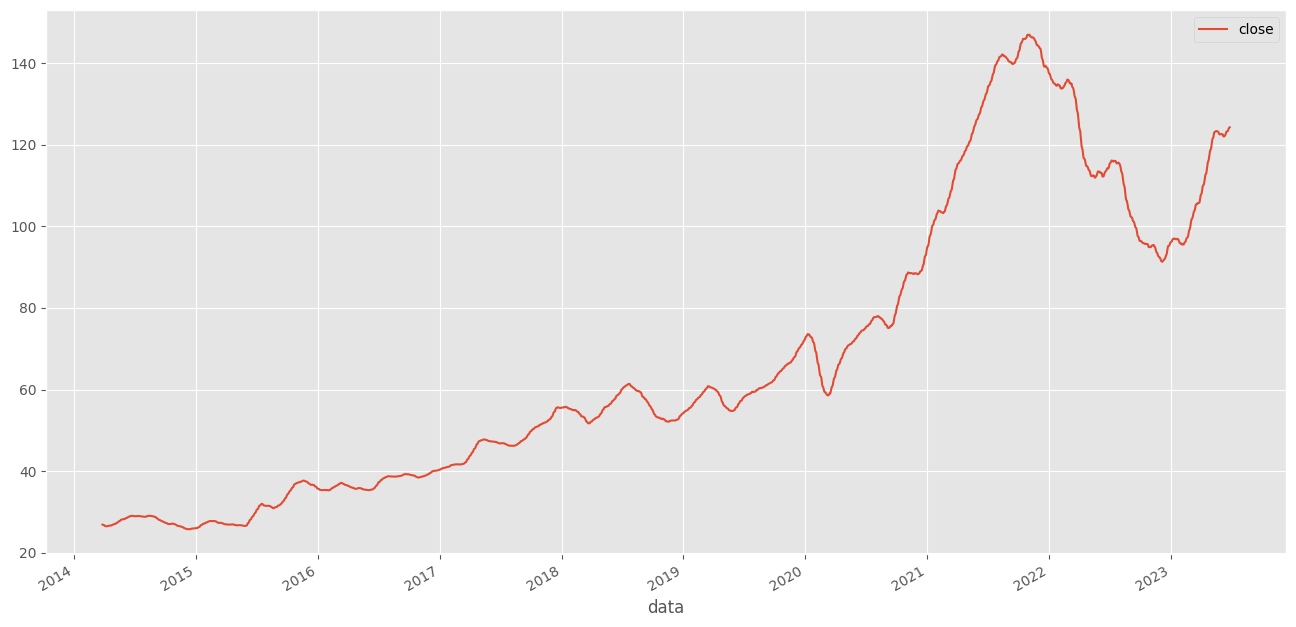

In [24]:
style.use("ggplot")                                         #Plot
df_no_noise.plot(x="data", y="close", figsize=(16,8))
plt.show()